In [74]:
#%pip install tensorflow tensorflow-addons tensorflow-model-optimization opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
#%pip install --upgrade tensorflow keras keras_preprocessing


  Using cached tensorflow-2.16.2-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Using cached tensorflow_intel-2.16.2-cp310-cp310-win_amd64.whl (376.9 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-win_amd64.whl (127 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ayril\\Documents\\DEGREE\\SEM 6\\CSC566\\566_assignment_ai\\venv\\Lib\\site-packages\\~l_dtypes\\_custom_floats.cp310-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
#%pip install tensorflow==2.15.0

  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
#%pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
asttokens                     2.4.1
astunparse                    1.6.3
blinker                       1.8.2
cachetools                    5.3.3
certifi                       2024.7.4
charset-normalizer            3.3.2
click                         8.1.7
colorama                      0.4.6
comm                          0.2.2
contourpy                     1.2.1
cycler                        0.12.1
debugpy                       1.8.2
decorator                     5.1.1
dm-tree                       0.1.8
exceptiongroup                1.2.1
executing                     2.0.1
Flask                         3.0.3
flatbuffers                   24.3.25
fonttools                     4.53.1
gast                          0.6.0
google-auth                   2.31.0
google-auth-oauthlib          1.2.0
google-pasta                  0.2.0
grpcio                        1.64.1
h5py       


[notice] A new release of pip available: 22.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [85]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
channels =  3
EPOCHS = 10

In [86]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
	"tomato_diseases",
	shuffle=True,
	image_size = (IMAGE_SIZE, IMAGE_SIZE),
	batch_size = BATCH_SIZE
)

Found 3181 files belonging to 5 classes.


In [87]:
class_names = dataset.class_names
class_names

['Early_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'healthy',
 'powdery_mildew']

In [88]:
len(dataset)

100

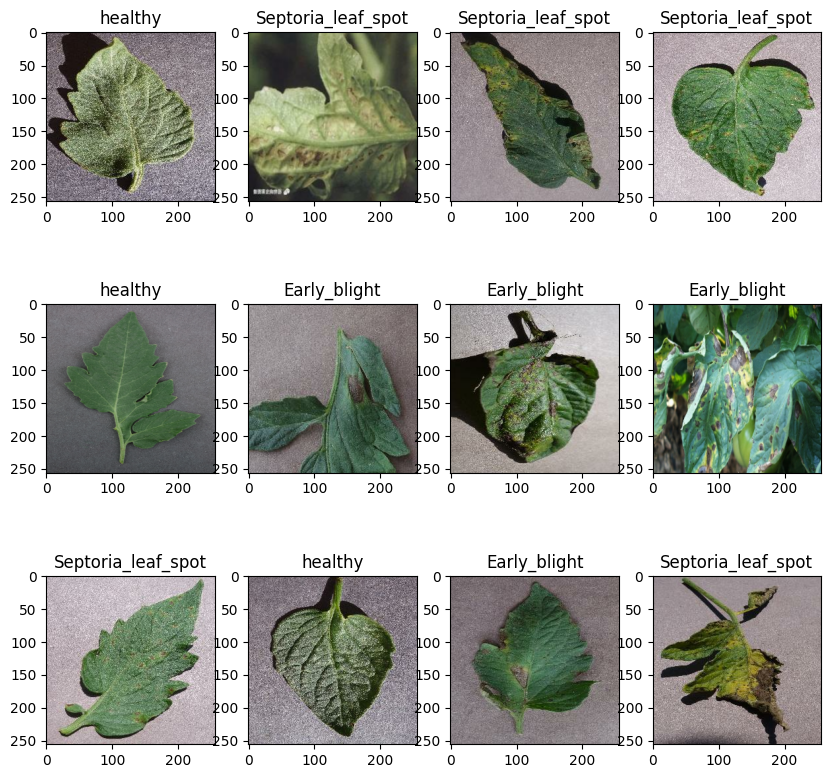

In [89]:
#To see why len is 96
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)#Make it display all the range images
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        #plt.imshow(image_batch[0].numpy().astype("uint8"))#Show only 1 image at a time
        plt.title(class_names[label_batch[i]]) #Display label name of the class picture
        #print(image_batch[0].shape)
        #print(label_batch.numpy())

In [90]:
#to get 80% from the 100 dataset
train_size = 0.8 #80%
len(dataset)*train_size

80.0

In [91]:
train_ds = dataset.take(80)
len(train_ds)

80

In [92]:
test_ds = dataset.skip(80)
len(test_ds) #the len is 20 because 100 - 80

20

In [93]:
val_size = 0.1 #10%
len(dataset)*val_size

10.0

In [94]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [95]:
test_ds = test_ds.skip(10)
len(test_ds)

10

In [96]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [97]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [98]:
len(train_ds)

80

In [99]:
len(val_ds)

10

In [100]:
len(test_ds)

10

In [101]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [103]:
import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    #layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    #layers.Rescaling(1.0/255)
])

In [104]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    #layers.RandomFlip("horizontal_and_vertical"),
    #layers.RandomRotation(0.2)
])

In [106]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, channels)
n_classes = 5 #Number of folders in the dataset


model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    #layers.Conv2D(32, (3,3), activation='relu'),
    #layers.Input(shape=input_shape), #This is good if still want to use input_shape
    layers.MaxPooling2D((2,2)), #The tutorial guy multiple maxpooling because dia trial error
    layers.Conv2D(100, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(100, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(100, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(100, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(100, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 100)       28900     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 100)         0         
 g2D)                                                 

In [107]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [108]:
#Check invalid data
from pathlib import Path
import imghdr

data_dir = "tomato_diseases"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")


In [110]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10


80/80 [==============================] - 233s 3s/step - loss: 1.5294 - accuracy: 0.2870 - val_loss: 1.3993 - val_accuracy: 0.3857
Epoch 2/10
80/80 [==============================] - 237s 3s/step - loss: 1.3144 - accuracy: 0.4422 - val_loss: 1.3127 - val_accuracy: 0.5353
Epoch 3/10
80/80 [==============================] - 236s 3s/step - loss: 1.0980 - accuracy: 0.5559 - val_loss: 1.0713 - val_accuracy: 0.5492
Epoch 4/10
80/80 [==============================] - 238s 3s/step - loss: 0.9481 - accuracy: 0.6143 - val_loss: 0.9217 - val_accuracy: 0.6336
Epoch 5/10
80/80 [==============================] - 240s 3s/step - loss: 0.9001 - accuracy: 0.6328 - val_loss: 0.9921 - val_accuracy: 0.6190
Epoch 6/10
80/80 [==============================] - 242s 3s/step - loss: 0.7888 - accuracy: 0.7008 - val_loss: 0.8707 - val_accuracy: 0.6810
Epoch 7/10
80/80 [==============================] - 239s 3s/step - loss: 0.7497 - accuracy: 0.7114 - val_loss: 0.8240 - val_accuracy: 0.6909
Epoch 8/10
80/80 [======

In [111]:
scores = model.evaluate(test_ds)

80/80 [==============================] - 33s 411ms/step - loss: 0.6304 - accuracy: 0.7635


In [112]:
#scores

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

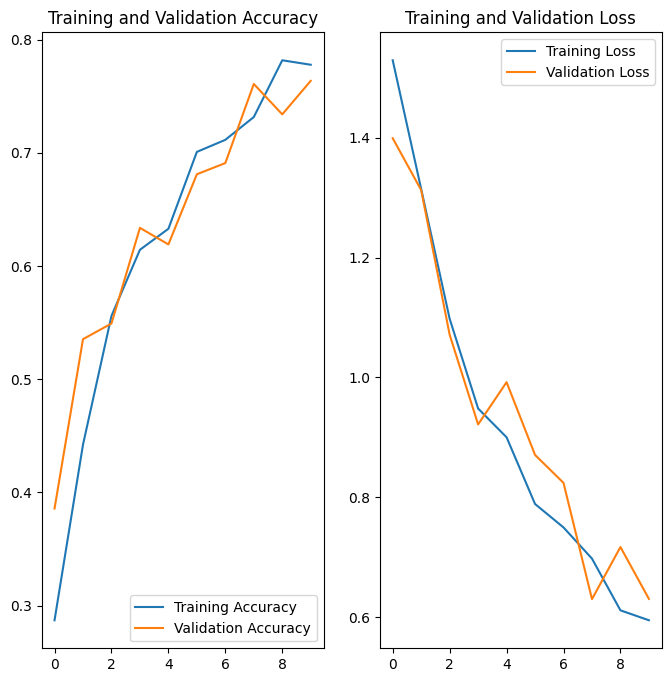

In [114]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: powdery_mildew
1/1 [==============================] - 1s 523ms/step
predicted label: Early_blight


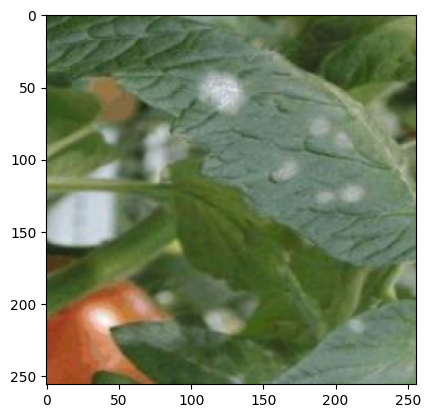

In [115]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [117]:
#Function to tell confidence of prediction and class name
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


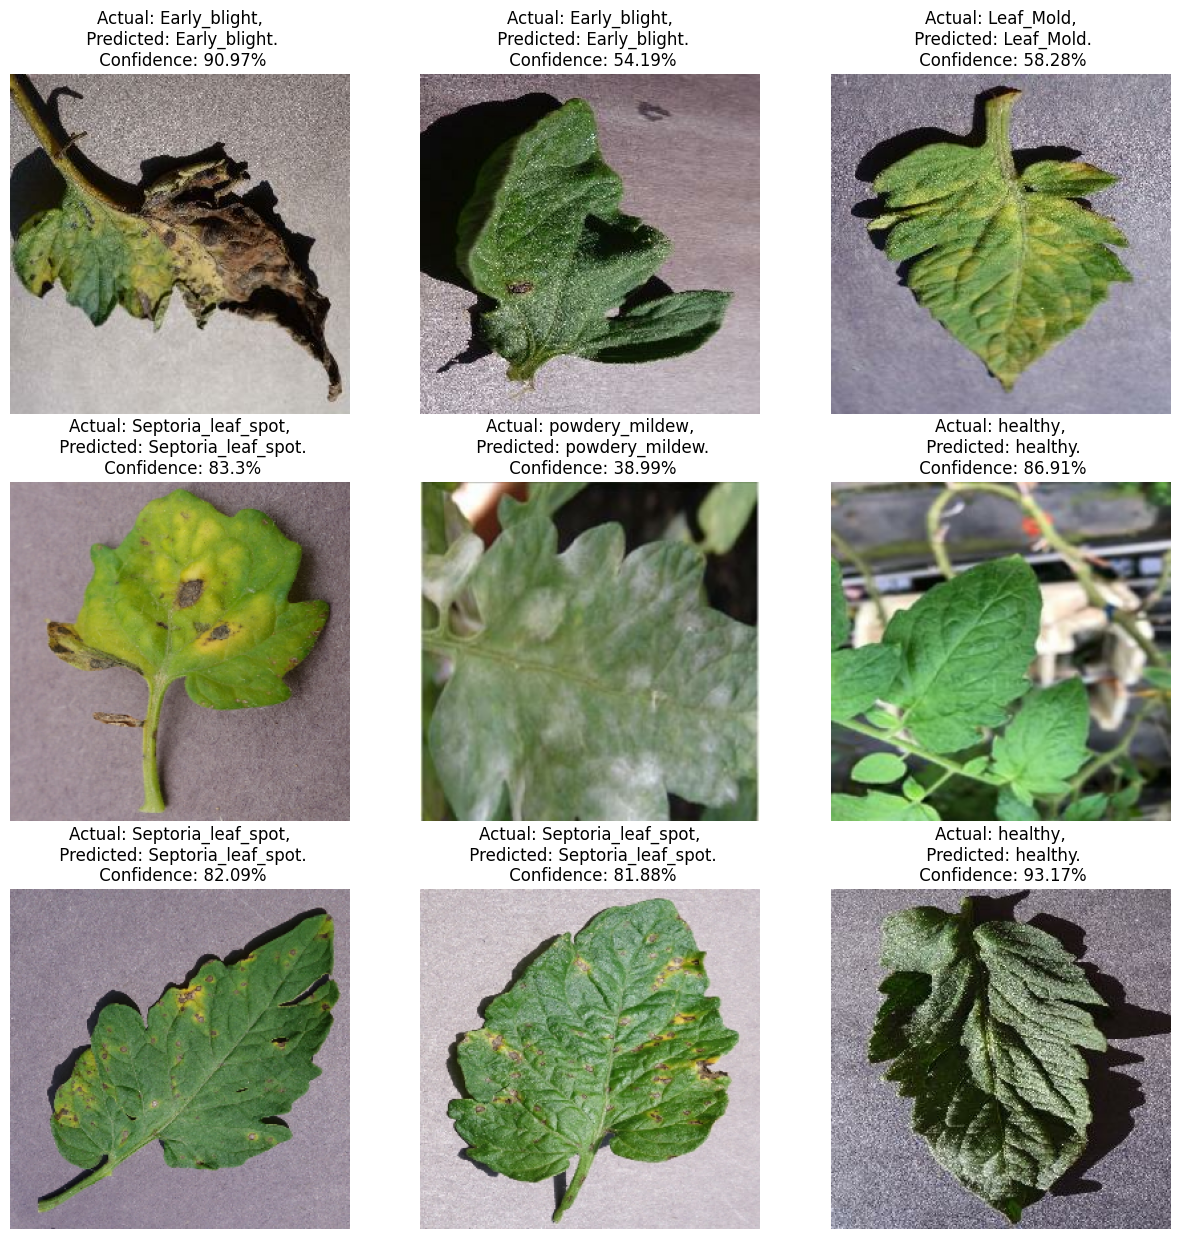

In [118]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [120]:
model.save("./tomato_disease2.h5")